In [10]:
import torch
words = open('names.txt','r').read().splitlines()



In [11]:
len(words)


32033

In [12]:
min(len(w) for w in words)

2

In [13]:
max(len(w) for w in words)


15

In [14]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [52]:
N = torch.zeros((27,27),dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [54]:
#Keep a dictionary to store count of the bigrams 
stoi['.'] = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1

In [55]:
stoi



{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

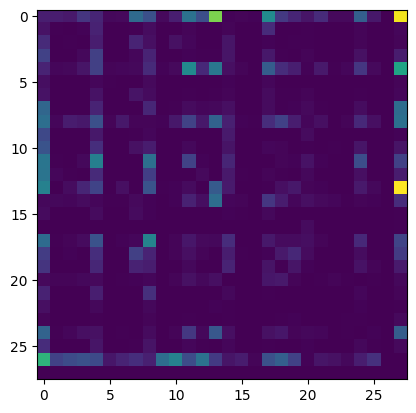

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)


In [56]:
N[0]


tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [60]:
p = N[0].float()


In [61]:
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [62]:
p/=p.sum()

In [63]:
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [64]:
p.sum()

tensor(1.)

In [65]:
#Generator 
g = torch.Generator().manual_seed(2147483647)

In [67]:
p = torch.rand(3,generator = g)
p = p/p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [68]:
torch.multinomial(p,num_samples = 20, replacement = True,generator=g)


tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [69]:
itos = {i:s for s,i in stoi.items()}

In [70]:
itos


{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [82]:
out = []
itos = {i:s for s,i in stoi.items()}
ix = 0
while True:
    p = N[ix].float()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
print(''.join(out))

rish.


In [83]:
P = (N+1).float()


In [84]:
P


tensor([[1.0000e+00, 4.4110e+03, 1.3070e+03, 1.5430e+03, 1.6910e+03, 1.5320e+03,
         4.1800e+02, 6.7000e+02, 8.7500e+02, 5.9200e+02, 2.4230e+03, 2.9640e+03,
         1.5730e+03, 2.5390e+03, 1.1470e+03, 3.9500e+02, 5.1600e+02, 9.3000e+01,
         1.6400e+03, 2.0560e+03, 1.3090e+03, 7.9000e+01, 3.7700e+02, 3.0800e+02,
         1.3500e+02, 5.3600e+02, 9.3000e+02],
        [6.6410e+03, 5.5700e+02, 5.4200e+02, 4.7100e+02, 1.0430e+03, 6.9300e+02,
         1.3500e+02, 1.6900e+02, 2.3330e+03, 1.6510e+03, 1.7600e+02, 5.6900e+02,
         2.5290e+03, 1.6350e+03, 5.4390e+03, 6.4000e+01, 8.3000e+01, 6.1000e+01,
         3.2650e+03, 1.1190e+03, 6.8800e+02, 3.8200e+02, 8.3500e+02, 1.6200e+02,
         1.8300e+02, 2.0510e+03, 4.3600e+02],
        [1.1500e+02, 3.2200e+02, 3.9000e+01, 2.0000e+00, 6.6000e+01, 6.5600e+02,
         1.0000e+00, 1.0000e+00, 4.2000e+01, 2.1800e+02, 2.0000e+00, 1.0000e+00,
         1.0400e+02, 1.0000e+00, 5.0000e+00, 1.0600e+02, 1.0000e+00, 1.0000e+00,
         8.4300e+

In [85]:
P /= P.sum(1,keepdims=True)

In [86]:

P

tensor([[3.1192e-05, 1.3759e-01, 4.0767e-02, 4.8129e-02, 5.2745e-02, 4.7785e-02,
         1.3038e-02, 2.0898e-02, 2.7293e-02, 1.8465e-02, 7.5577e-02, 9.2452e-02,
         4.9064e-02, 7.9195e-02, 3.5777e-02, 1.2321e-02, 1.6095e-02, 2.9008e-03,
         5.1154e-02, 6.4130e-02, 4.0830e-02, 2.4641e-03, 1.1759e-02, 9.6070e-03,
         4.2109e-03, 1.6719e-02, 2.9008e-02],
        [1.9583e-01, 1.6425e-02, 1.5983e-02, 1.3889e-02, 3.0756e-02, 2.0435e-02,
         3.9809e-03, 4.9835e-03, 6.8796e-02, 4.8685e-02, 5.1899e-03, 1.6779e-02,
         7.4575e-02, 4.8213e-02, 1.6039e-01, 1.8872e-03, 2.4475e-03, 1.7988e-03,
         9.6279e-02, 3.2997e-02, 2.0288e-02, 1.1264e-02, 2.4623e-02, 4.7771e-03,
         5.3963e-03, 6.0480e-02, 1.2857e-02],
        [4.3039e-02, 1.2051e-01, 1.4596e-02, 7.4850e-04, 2.4701e-02, 2.4551e-01,
         3.7425e-04, 3.7425e-04, 1.5719e-02, 8.1587e-02, 7.4850e-04, 3.7425e-04,
         3.8922e-02, 3.7425e-04, 1.8713e-03, 3.9671e-02, 3.7425e-04, 3.7425e-04,
         3.1549e-

In [87]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [88]:
#Now we compute the negative log likelihood
#Since log is monotonically increasing, -ll will tend to zero for better perf

In [89]:
log_likelihood = 0.0
n =0
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1,ch2 in zip(chs,chs[1:]):
        idx1 = stoi[ch1]
        idx2 = stoi[ch2] 
        prob = P[idx1,idx2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n+=1

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')
        

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [90]:
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [91]:
xs,ys


(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [92]:
#Since we're feeding this values into a neural network , it's better to pass vectors instead of our indexed integers

In [93]:
#Thus we use one hot encoding here 


In [94]:
import torch.nn.functional as F


In [104]:
xenc=F.one_hot(xs,num_classes=27)

In [105]:
#Thus if it's 13 , the 13th bit is set to 1
xenc.shape

torch.Size([5, 27])

In [111]:
xenc.dtype


torch.float32

In [109]:
xenc = xenc.float()

In [110]:
xenc.dtype

torch.float32

In [115]:
W= torch.randn((27,27))
(xenc @ W).shape

torch.Size([5, 27])

In [113]:
xenc.shape

torch.Size([5, 27])

In [116]:
(xenc@W)[3,13]


tensor(-0.3907)

In [121]:
logits = xenc@W
logits

tensor([[ 1.9844,  0.9992,  0.6582, -0.8410, -0.8602, -0.0301,  2.0178,  0.8959,
          0.3757, -1.0925,  0.0240, -0.5320,  0.9607,  0.7177, -1.4870, -1.9215,
          0.2350, -0.0964,  1.6521,  0.1167,  0.8388, -0.7845, -0.1090,  1.4801,
          0.4658,  0.3441,  0.1293],
        [-0.4268, -0.7665,  0.0846,  1.2097, -0.6317, -2.4802,  0.7861,  1.2715,
          0.2643,  1.7048,  1.8006, -0.7082,  0.1985,  0.9611,  0.3430,  0.9466,
         -0.0618, -2.0102, -0.4922,  2.0397, -0.6206, -0.2144,  0.1778, -0.0316,
          0.8780, -0.2739, -0.1207],
        [ 0.2739, -0.1670,  0.1526, -0.8815, -0.3765, -1.1013,  1.2181, -1.0394,
          0.4690, -0.7823, -0.9294,  1.3504, -0.4592, -0.3907,  0.0715, -0.7775,
         -0.7512,  0.6542,  1.2290, -0.6147, -0.2802, -0.6560,  0.5753, -0.2181,
          1.0626, -1.6716, -1.3646],
        [ 0.2739, -0.1670,  0.1526, -0.8815, -0.3765, -1.1013,  1.2181, -1.0394,
          0.4690, -0.7823, -0.9294,  1.3504, -0.4592, -0.3907,  0.0715, -0.7775

In [122]:
counts

tensor([[7.2749, 2.7161, 1.9314, 0.4313, 0.4231, 0.9703, 7.5218, 2.4495, 1.4560,
         0.3354, 1.0243, 0.5874, 2.6135, 2.0498, 0.2261, 0.1464, 1.2650, 0.9081,
         5.2179, 1.1237, 2.3136, 0.4564, 0.8968, 4.3934, 1.5933, 1.4107, 1.1381],
        [0.6526, 0.4646, 1.0883, 3.3525, 0.5317, 0.0837, 2.1948, 3.5660, 1.3026,
         5.5000, 6.0531, 0.4925, 1.2196, 2.6146, 1.4091, 2.5769, 0.9400, 0.1340,
         0.6113, 7.6881, 0.5376, 0.8070, 1.1946, 0.9689, 2.4061, 0.7604, 0.8863],
        [1.3150, 0.8462, 1.1648, 0.4141, 0.6862, 0.3324, 3.3808, 0.3537, 1.5984,
         0.4574, 0.3948, 3.8588, 0.6318, 0.6766, 1.0741, 0.4596, 0.4718, 1.9237,
         3.4178, 0.5408, 0.7556, 0.5189, 1.7777, 0.8040, 2.8939, 0.1880, 0.2555],
        [1.3150, 0.8462, 1.1648, 0.4141, 0.6862, 0.3324, 3.3808, 0.3537, 1.5984,
         0.4574, 0.3948, 3.8588, 0.6318, 0.6766, 1.0741, 0.4596, 0.4718, 1.9237,
         3.4178, 0.5408, 0.7556, 0.5189, 1.7777, 0.8040, 2.8939, 0.1880, 0.2555],
        [1.5518, 1.0880,

In [124]:
probs = counts/counts.sum(1,keepdims =True)



In [125]:
probs

tensor([[0.1376, 0.0514, 0.0365, 0.0082, 0.0080, 0.0184, 0.1423, 0.0463, 0.0275,
         0.0063, 0.0194, 0.0111, 0.0494, 0.0388, 0.0043, 0.0028, 0.0239, 0.0172,
         0.0987, 0.0213, 0.0438, 0.0086, 0.0170, 0.0831, 0.0301, 0.0267, 0.0215],
        [0.0130, 0.0093, 0.0217, 0.0670, 0.0106, 0.0017, 0.0439, 0.0713, 0.0260,
         0.1099, 0.1210, 0.0098, 0.0244, 0.0523, 0.0282, 0.0515, 0.0188, 0.0027,
         0.0122, 0.1536, 0.0107, 0.0161, 0.0239, 0.0194, 0.0481, 0.0152, 0.0177],
        [0.0422, 0.0271, 0.0373, 0.0133, 0.0220, 0.0107, 0.1084, 0.0113, 0.0512,
         0.0147, 0.0127, 0.1237, 0.0203, 0.0217, 0.0344, 0.0147, 0.0151, 0.0617,
         0.1096, 0.0173, 0.0242, 0.0166, 0.0570, 0.0258, 0.0928, 0.0060, 0.0082],
        [0.0422, 0.0271, 0.0373, 0.0133, 0.0220, 0.0107, 0.1084, 0.0113, 0.0512,
         0.0147, 0.0127, 0.1237, 0.0203, 0.0217, 0.0344, 0.0147, 0.0151, 0.0617,
         0.1096, 0.0173, 0.0242, 0.0166, 0.0570, 0.0258, 0.0928, 0.0060, 0.0082],
        [0.0482, 0.0338,

In [126]:
probs[0].sum()

tensor(1.0000)

In [127]:
probs.sum()

tensor(5.0000)

In [128]:
probs.shape

torch.Size([5, 27])